In [1]:
import sys, os, importlib

sys.path.insert(0, os.path.abspath('src'))

In [2]:
import ensbinclass
print("\nensbinclass loaded from:", getattr(ensbinclass, '__file__'))


ensbinclass loaded from: C:\Users\koodz\PycharmProjects\ensemble-binclass\ensemble-binclass\src\ensbinclass\__init__.py


In [3]:
importlib.reload(ensbinclass)
print("After reload, ensbinclass from:", getattr(ensbinclass, '__file__'))

After reload, ensbinclass from: C:\Users\koodz\PycharmProjects\ensemble-binclass\ensemble-binclass\src\ensbinclass\__init__.py


Import package

In [4]:
from ensbinclass import preprocessing as pre
from ensbinclass import featureSelection as fs
from ensbinclass import classifier as cl
from ensbinclass import ensemble as ens

In [5]:
import numpy as np
np.random.seed(42)

In [6]:
pr = pre.DataPreprocessing()
pr.load_data('test_data/exampleData_TCGA_LUAD_2000.csv')
pr.show_data()

All columns are numeric
   class      SFTPC     SLC6A4     CLDN18       AGER     ITLN2       LGI3  \
0      0  19.565434  11.948064  14.314268  15.756623  9.202700  11.049183   
1      0  18.824004  12.127599  14.107543  14.666530  7.496016  10.956929   
2      0  18.541982  11.717890  13.501939  14.938679  8.440654   9.740685   
3      0  18.834542   8.590520  14.136818  14.011273  7.259753  10.837580   
4      0  18.988565  10.902216  13.828533  15.863138  9.767983  11.351842   

   C13orf36    FAM83A      FABP4  ...      NEXN     RASSF8      NKD1  \
0  7.818923  4.642644  12.009267  ...  9.059099   9.661631  7.501577   
1  5.994559  4.397002  13.407288  ...  8.334598   9.468622  5.375092   
2  7.331127  1.885184  13.957463  ...  9.298702   9.831359  7.455912   
3  4.755828  3.122491   8.505092  ...  7.241495   9.734491  4.948227   
4  9.122156  5.235413  10.818281  ...  9.521703  10.004926  8.256334   

     PLEKHH2      EDN2     WDR86    CHRNB4     RNF128  C11orf21     APOLD1  
0  

In [7]:
X, y = pr.set_target('class')

In [8]:
X.head()

,SFTPC,SLC6A4,CLDN18,AGER,ITLN2,LGI3,C13orf36,FAM83A,FABP4,HBA1,...,NEXN,RASSF8,NKD1,PLEKHH2,EDN2,WDR86,CHRNB4,RNF128,C11orf21,APOLD1
0,19.565434,11.948064,14.314268,15.756623,9.202700,11.049183,7.818923,4.642644,12.009267,11.625132,...,9.059099,9.661631,7.501577,9.103012,2.953098,4.219718,0.459117,9.332455,6.570504,9.026301
1,18.824004,12.127599,14.107543,14.666530,7.496016,10.956929,5.994559,4.397002,13.407288,14.257794,...,8.334598,9.468622,5.375092,8.509454,5.702741,4.540306,0.790605,9.044078,7.632262,8.920245
2,18.541982,11.717890,13.501939,14.938679,8.440654,9.740685,7.331127,1.885184,13.957463,12.763559,...,9.298702,9.831359,7.455912,8.642816,6.183097,5.274858,0.621806,8.867469,5.514766,9.829651
3,18.834542,8.590520,14.136818,14.011273,7.259753,10.837580,4.755828,3.122491,8.505092,12.965429,...,7.241495,9.734491,4.948227,8.501261,3.122491,2.761647,0.000000,9.414210,4.755828,10.110224
4,18.988565,10.902216,13.828533,15.863138,9.767983,11.351842,9.122156,5.235413,10.818281,12.001706,...,9.521703,10.004926,8.256334,10.130015,1.345283,4.646168,1.158789,10.130412,5.370506,10.078726


In [9]:
X = pr.normalization()
X.head()

,SFTPC,SLC6A4,CLDN18,AGER,ITLN2,LGI3,C13orf36,FAM83A,FABP4,HBA1,...,NEXN,RASSF8,NKD1,PLEKHH2,EDN2,WDR86,CHRNB4,RNF128,C11orf21,APOLD1
0,0.977262,0.870346,0.882702,0.936448,0.805363,0.925973,0.670372,0.297657,0.860419,0.747605,...,0.741100,0.678970,0.496213,0.677000,0.255288,0.391644,0.061514,0.691199,0.814399,0.466708
1,0.940229,0.883424,0.869954,0.859260,0.656004,0.918242,0.513956,0.281908,0.960582,0.916910,...,0.646941,0.655581,0.324971,0.592791,0.492987,0.421399,0.105929,0.665382,0.946002,0.453932
2,0.926143,0.853579,0.832609,0.878530,0.738673,0.816315,0.628550,0.120866,1.000000,0.820816,...,0.772240,0.699538,0.492535,0.611712,0.534513,0.489574,0.083312,0.649571,0.683543,0.563481
3,0.940756,0.625768,0.871760,0.812862,0.635328,0.908240,0.407751,0.200194,0.609358,0.833799,...,0.504878,0.687799,0.290596,0.591629,0.269931,0.256316,0.000000,0.698518,0.589474,0.597280
4,0.948449,0.794162,0.852749,0.943990,0.854833,0.951337,0.782107,0.335661,0.775089,0.771822,...,0.801222,0.720571,0.556992,0.822703,0.116296,0.431224,0.155259,0.762636,0.665662,0.593485


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

Feature selection

LASSO

In [11]:
lasso_features = fs.FeatureSelection(
    X, 
    y,
    method_='lasso',
    size=100,
    params={
        'alpha': 0.1,
        'fit_intercept': True,
        'precompute': False,
        'max_iter': 10000,
        'tol': 0.0001,
        'selection': 'cyclic',
        'random_state': 42,
    },
)

ReliefF

In [12]:
relieff_features = fs.FeatureSelection(
    X,
    y,
    method_='relieff',
    size=100,
    params={
        'n_neighbors': 100,
        'n_features_to_keep': 100,
    },
)

Ensemble

In [13]:
ensemble_features = fs.FeatureSelection(
    X=X,
    y=y,
    method_=['lasso', 'relieff'],
    size=100,
    efs=True,
    efs_method='union'
)

In [14]:
lasso_features.features

0      SFTPC
1     SLC6A4
2     CLDN18
3       AGER
4      ITLN2
       ...  
95     PITX1
96    CLEC3B
97     HTR3A
98      INMT
99      RETN
Name: LASSO, Length: 100, dtype: object

In [15]:
relieff_features.features

0          CELA2B
1           OR6K3
2     CCL14-CCL15
3           CHRM2
4          MAGEA2
         ...     
95        C2orf71
96         ANXA10
97          SPERT
98         CYP2F1
99      LOC150622
Name: RELIEFF, Length: 100, dtype: object

In [16]:
ensemble_features.ranked_features

,features,importance
0,ACADL,196
1,FAM83A,195
2,SOSTDC1,194
3,CST1,193
4,ITLN2,192
...,...,...
191,C3orf16,5
192,CHRM2,4
193,C10orf67,3
194,SLC6A4,2


In [17]:
ensemble_features.features

0         ACADL
1        FAM83A
2       SOSTDC1
3          CST1
4         ITLN2
         ...   
191     C3orf16
192       CHRM2
193    C10orf67
194      SLC6A4
195     AKR1B15
Name: ENSEMBLE, Length: 196, dtype: object

Classifier

In [18]:
clf = cl.Classifier(
    X,
    y,
    features=[
        relieff_features.features,
        lasso_features.features,
        ensemble_features.features
    ],
    classifiers=[
        'svm',
        'adaboost',
        'random_forest',
    ],
    classifier_params=[
        {'svm': {
            'C': 1, 'kernel': 'linear', 'gamma': 'auto'
            }
        },
        {'adaboost': {
            'n_estimators': 100, 'learning_rate': 0.9
            }
        },
        {'random_forest': {
            'n_estimators': 100, 'criterion': 'gini', 'max_depth': None
            }
        },
    ],
    cv='stratified_k_fold',
    cv_params={'n_splits': 10},
    repetitions=10,
)    

In [19]:
clf.all_metrics()

[{'RELIEFF_SVM': [np.float64(0.991), np.float64(0.011)],
  'RELIEFF_ADABOOST': [np.float64(0.993), np.float64(0.01)],
  'RELIEFF_RANDOM_FOREST': [np.float64(0.991), np.float64(0.012)],
  'LASSO_SVM': [np.float64(0.995), np.float64(0.009)],
  'LASSO_ADABOOST': [np.float64(0.994), np.float64(0.011)],
  'LASSO_RANDOM_FOREST': [np.float64(0.992), np.float64(0.012)],
  'ENSEMBLE_SVM': [np.float64(0.996), np.float64(0.008)],
  'ENSEMBLE_ADABOOST': [np.float64(0.995), np.float64(0.01)],
  'ENSEMBLE_RANDOM_FOREST': [np.float64(0.991), np.float64(0.012)]},
 {'RELIEFF_SVM': [np.float64(0.98), np.float64(0.037)],
  'RELIEFF_ADABOOST': [np.float64(0.988), np.float64(0.026)],
  'RELIEFF_RANDOM_FOREST': [np.float64(0.976), np.float64(0.048)],
  'LASSO_SVM': [np.float64(0.982), np.float64(0.034)],
  'LASSO_ADABOOST': [np.float64(0.986), np.float64(0.029)],
  'LASSO_RANDOM_FOREST': [np.float64(0.983), np.float64(0.031)],
  'ENSEMBLE_SVM': [np.float64(0.99), np.float64(0.027)],
  'ENSEMBLE_ADABOOST': [

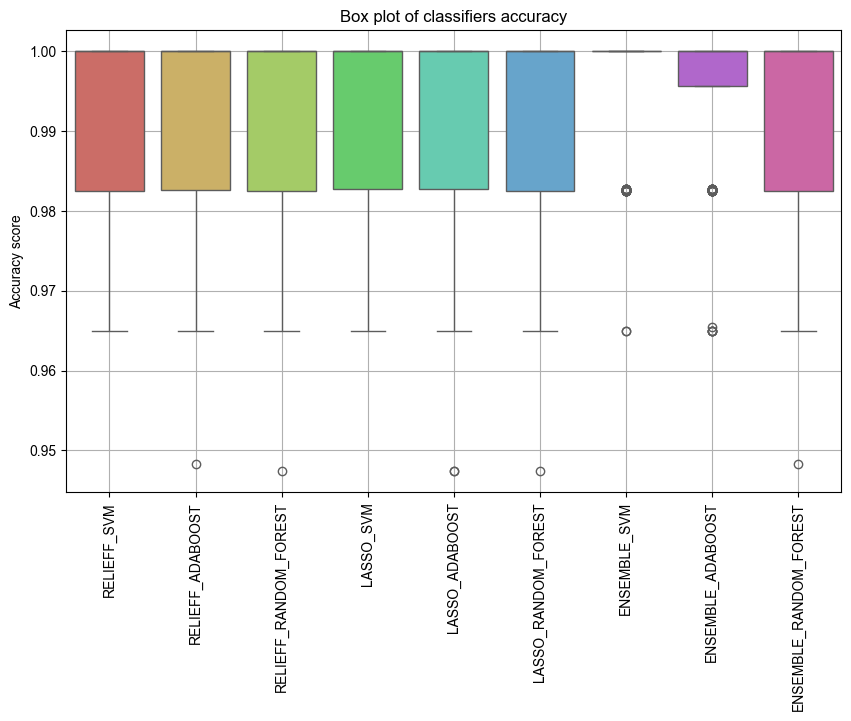

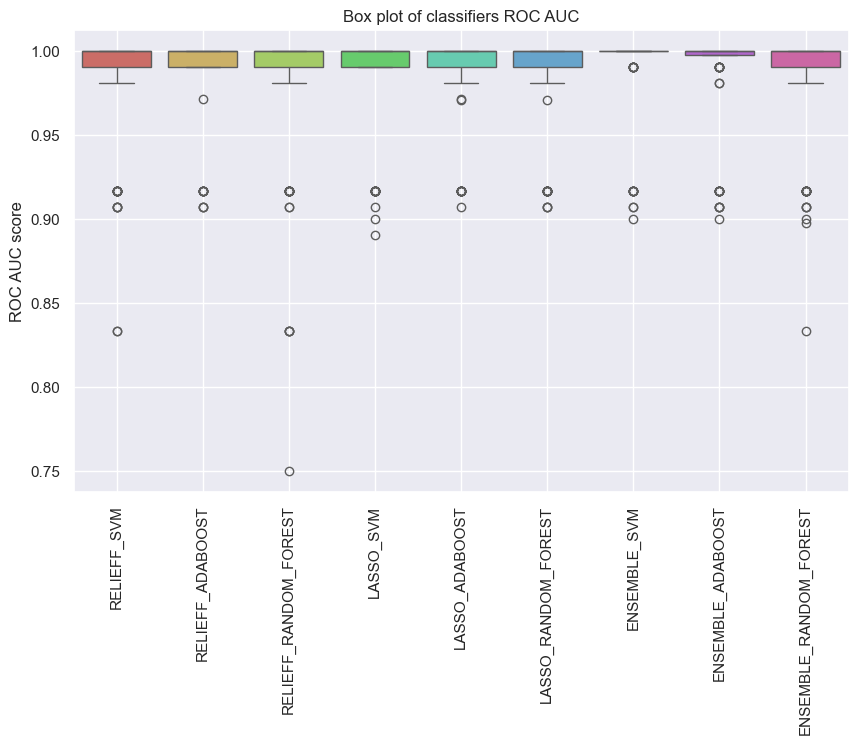

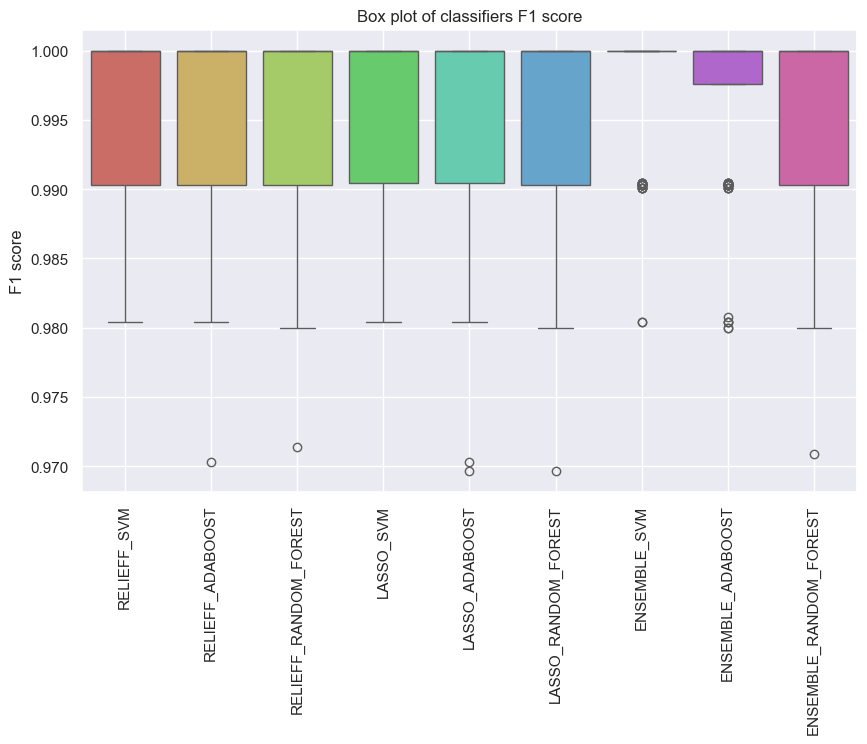

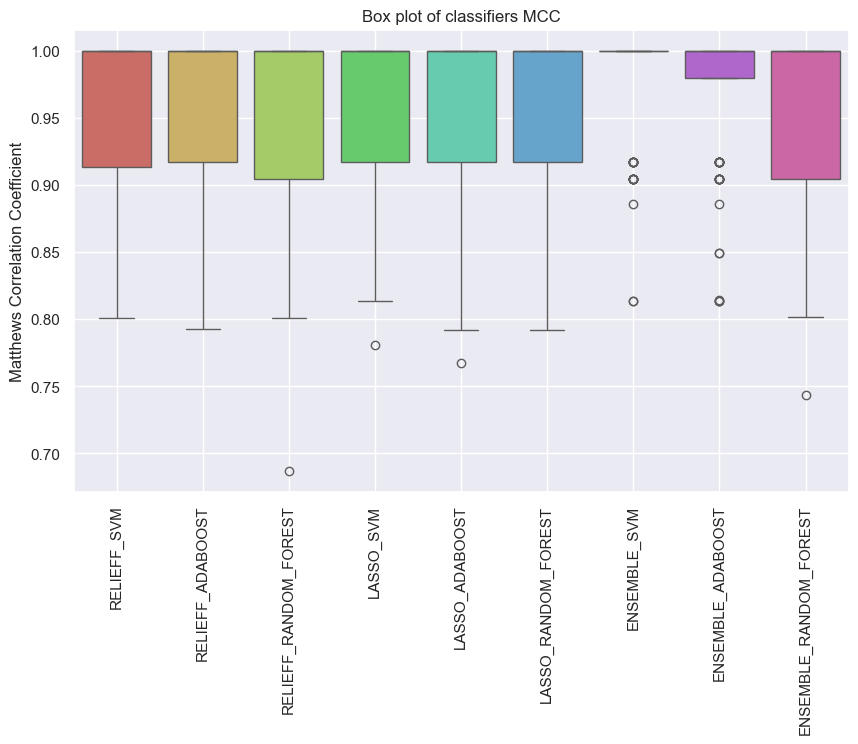

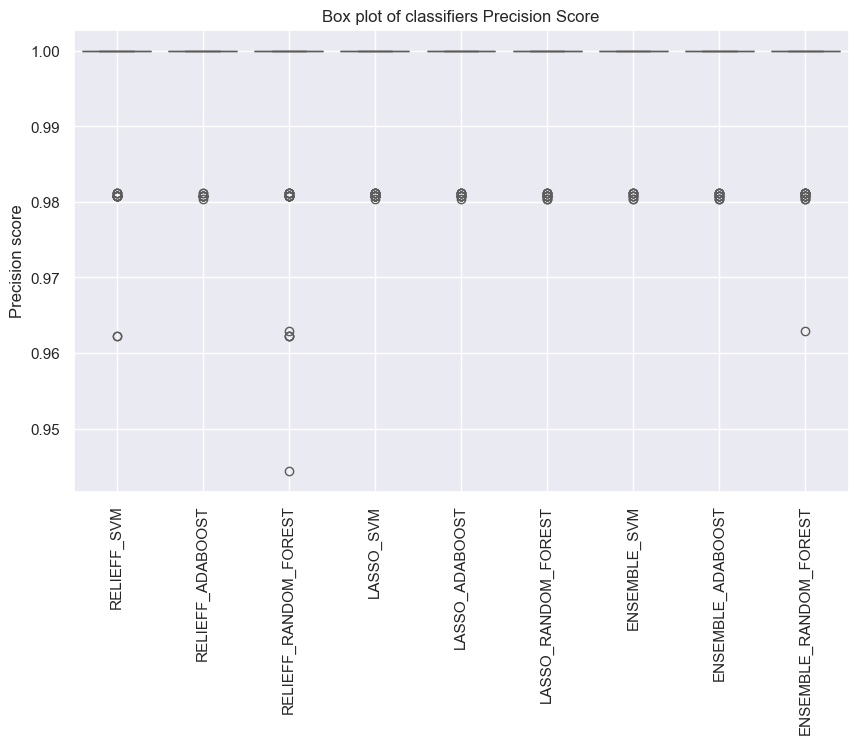

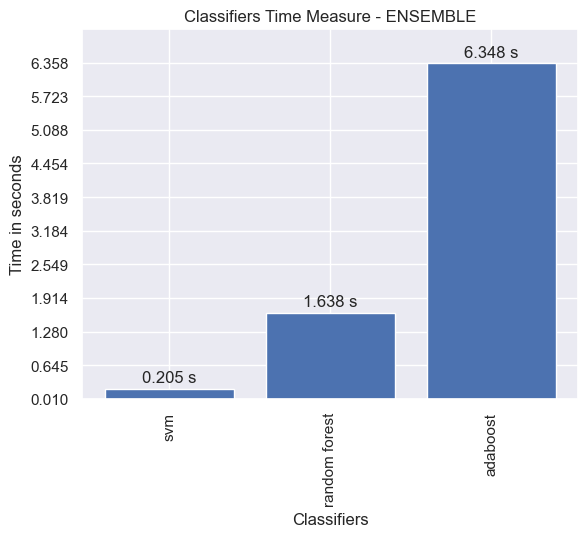

svm: 0.205 s.
random forest: 1.638 s.
adaboost: 6.348 s.


In [20]:
clf.plot_all()

Ensemble

In [21]:
ens_voting = ens.Ensemble(
    X,
    y,
    features=[
        relieff_features.features,
        lasso_features.features,
        ensemble_features.features
    ],
    classifiers=[
        'adaboost',
        'random_forest',
        'svm',
    ],
    classifier_params=[
        {'adaboost': {
            'n_estimators': 100, 'learning_rate': 0.9,
            }
        },
        {'random_forest': {
            'n_estimators': 100, 'criterion': 'gini', 'max_depth': None,
            }
        },
        {'svm': {
            'C': 1, 'kernel': 'linear', 'gamma': 'auto'
            }
        },
    ],
    cv='stratified_k_fold',
    cv_params={'n_splits': 10},
    ensemble=[
        'voting',
    ],
    ensemble_params=[
        {'voting': {
            'voting': 'soft'
            }
        },
    ],
    repetitions=10,
)

In [22]:
ens_voting.all_metrics()

[{'RELIEFF_VOTING': [np.float64(0.993), np.float64(0.01)],
  'LASSO_VOTING': [np.float64(0.994), np.float64(0.011)],
  'ENSEMBLE_VOTING': [np.float64(0.995), np.float64(0.01)]},
 {'RELIEFF_VOTING': [np.float64(0.984), np.float64(0.031)],
  'LASSO_VOTING': [np.float64(0.985), np.float64(0.036)],
  'ENSEMBLE_VOTING': [np.float64(0.992), np.float64(0.024)]},
 {'RELIEFF_VOTING': [np.float64(0.996), np.float64(0.006)],
  'LASSO_VOTING': [np.float64(0.997), np.float64(0.006)],
  'ENSEMBLE_VOTING': [np.float64(0.997), np.float64(0.005)]},
 {'RELIEFF_VOTING': [np.float64(0.964), np.float64(0.051)],
  'LASSO_VOTING': [np.float64(0.969), np.float64(0.056)],
  'ENSEMBLE_VOTING': [np.float64(0.978), np.float64(0.048)]},
 {'RELIEFF_VOTING': [np.float64(0.997), np.float64(0.007)],
  'LASSO_VOTING': [np.float64(0.997), np.float64(0.008)],
  'ENSEMBLE_VOTING': [np.float64(0.998), np.float64(0.005)]}]

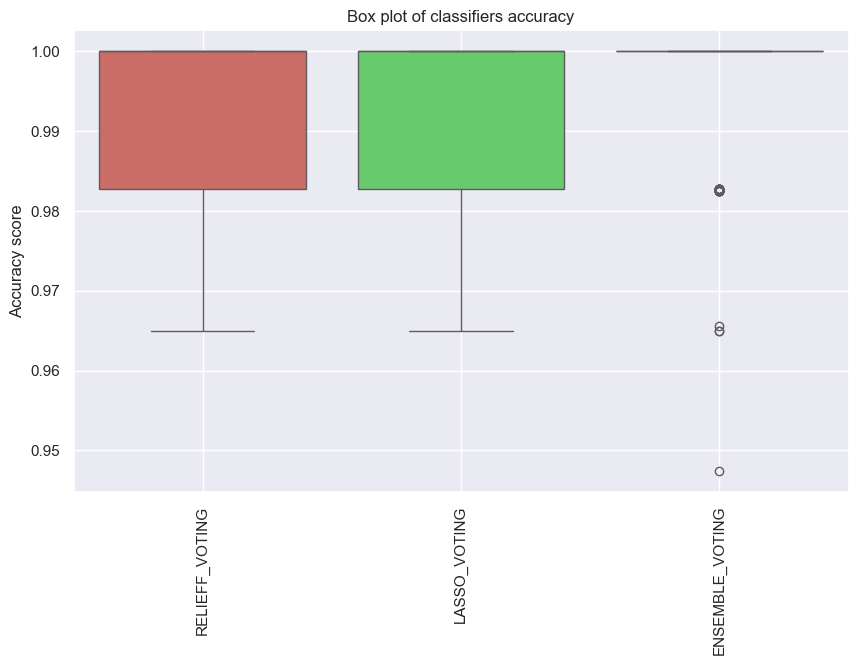

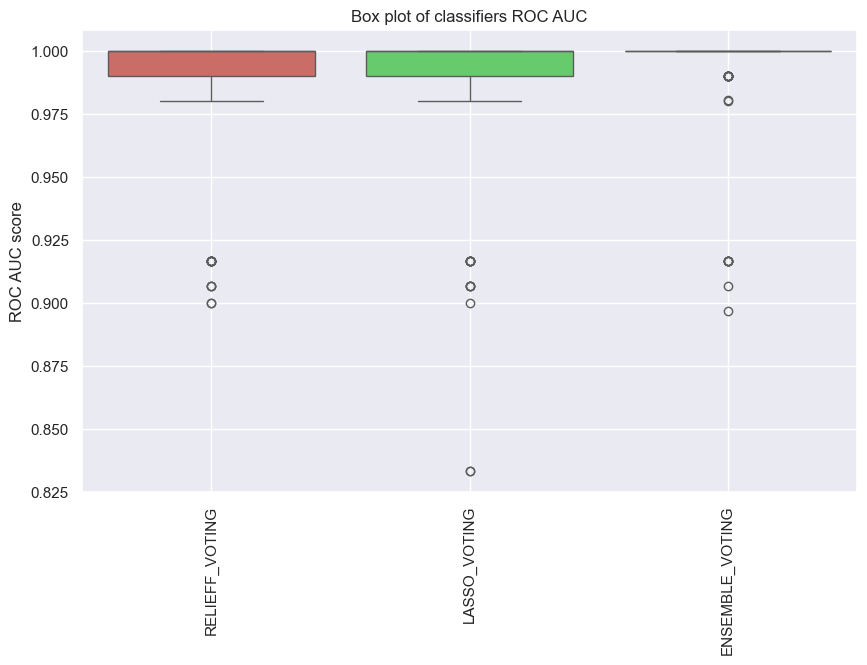

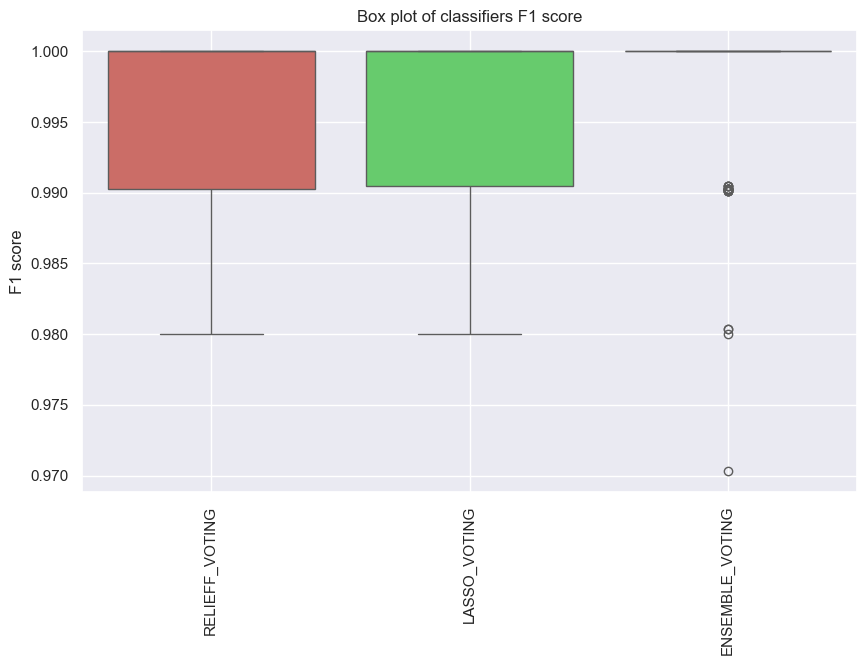

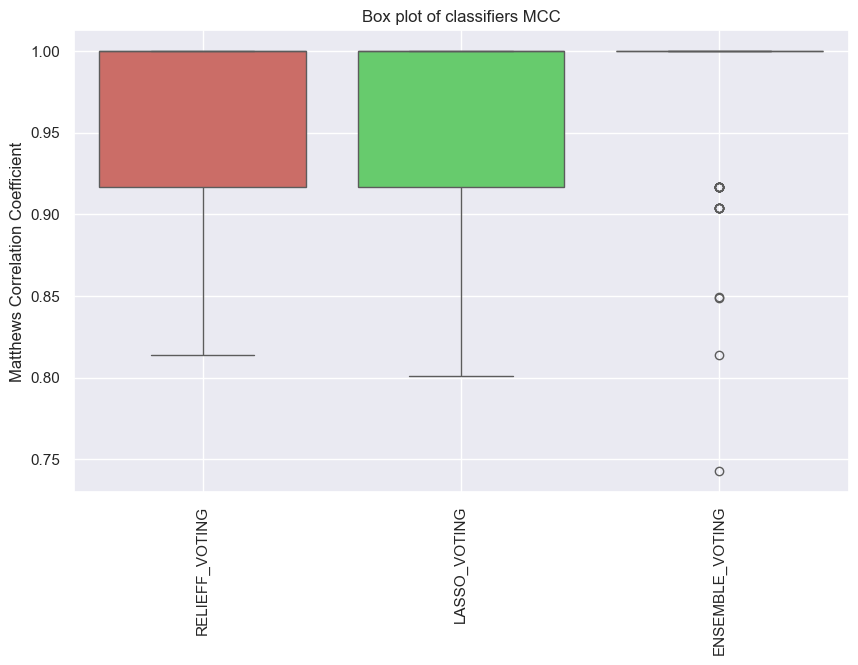

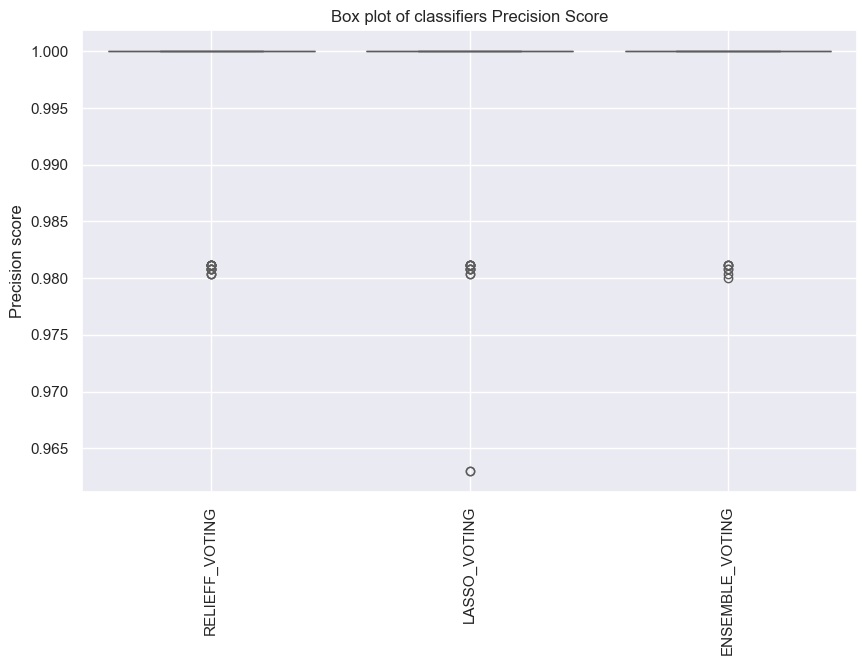

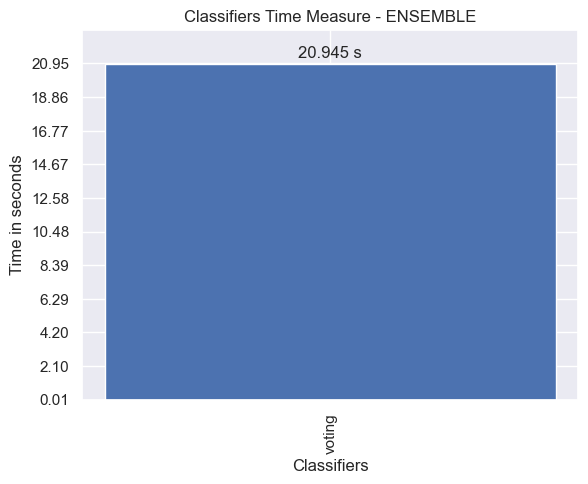

voting: 20.945 s.


In [23]:
ens_voting.plot_all()

In [24]:
ens_bagging = ens.Ensemble(
    X,
    y,
    features=[
        relieff_features.features,
        lasso_features.features,
        ensemble_features.features
    ],
    classifiers=[
        'adaboost',
        'random_forest',
        'svm',
    ],
    classifier_params=[
        {'adaboost': {
            'n_estimators': 100, 'learning_rate': 0.9,
            }
        },
        {'random_forest': {
            'n_estimators': 100, 'criterion': 'gini', 'max_depth': None,
            }
        },
        {'svm': {
            'C': 1, 'kernel': 'linear', 'gamma': 'auto'
            }
        },
    ],
    cv='stratified_k_fold',
    cv_params={'n_splits': 10},
    ensemble=[
        'bagging',
    ],
    ensemble_params=[
        {'bagging': {
            'estimator_name': 'random_forest', 'n_estimators': 100, 'max_samples': 0.5, 'max_features': 0.5
            }
        },
    ],
    repetitions=10,
)

In [25]:
ens_bagging.all_metrics()

[{'RELIEFF_BAGGING': [np.float64(0.988), np.float64(0.014)],
  'LASSO_BAGGING': [np.float64(0.99), np.float64(0.011)],
  'ENSEMBLE_BAGGING': [np.float64(0.99), np.float64(0.012)]},
 {'RELIEFF_BAGGING': [np.float64(0.961), np.float64(0.061)],
  'LASSO_BAGGING': [np.float64(0.979), np.float64(0.033)],
  'ENSEMBLE_BAGGING': [np.float64(0.982), np.float64(0.033)]},
 {'RELIEFF_BAGGING': [np.float64(0.994), np.float64(0.008)],
  'LASSO_BAGGING': [np.float64(0.994), np.float64(0.006)],
  'ENSEMBLE_BAGGING': [np.float64(0.995), np.float64(0.007)]},
 {'RELIEFF_BAGGING': [np.float64(0.936), np.float64(0.082)],
  'LASSO_BAGGING': [np.float64(0.949), np.float64(0.055)],
  'ENSEMBLE_BAGGING': [np.float64(0.951), np.float64(0.06)]},
 {'RELIEFF_BAGGING': [np.float64(0.992), np.float64(0.013)],
  'LASSO_BAGGING': [np.float64(0.996), np.float64(0.008)],
  'ENSEMBLE_BAGGING': [np.float64(0.997), np.float64(0.007)]}]

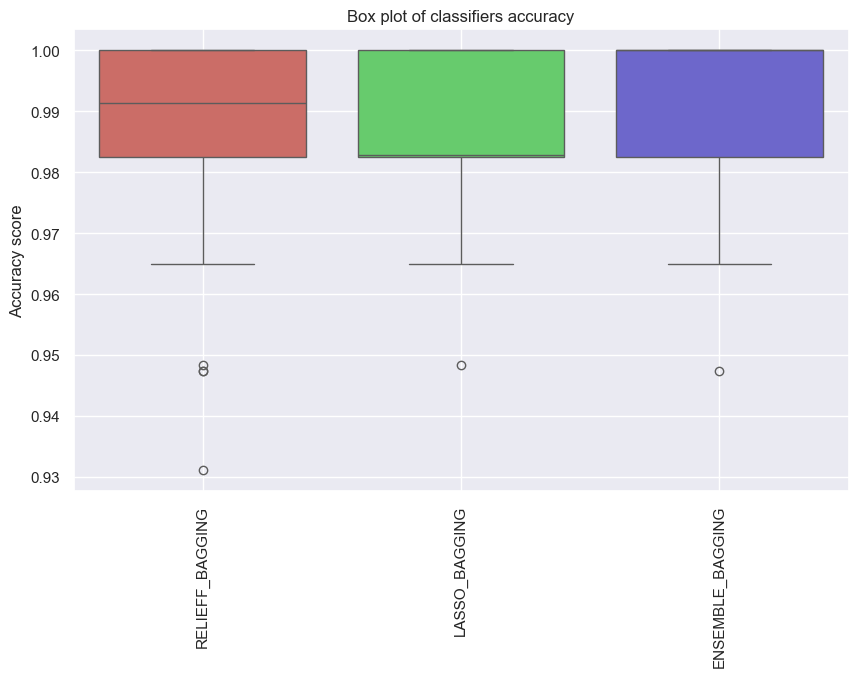

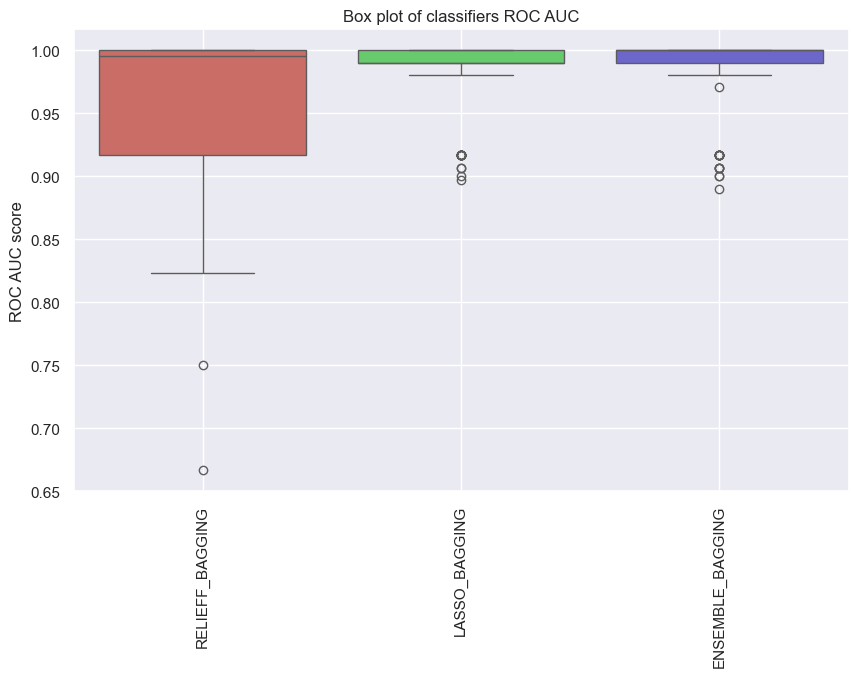

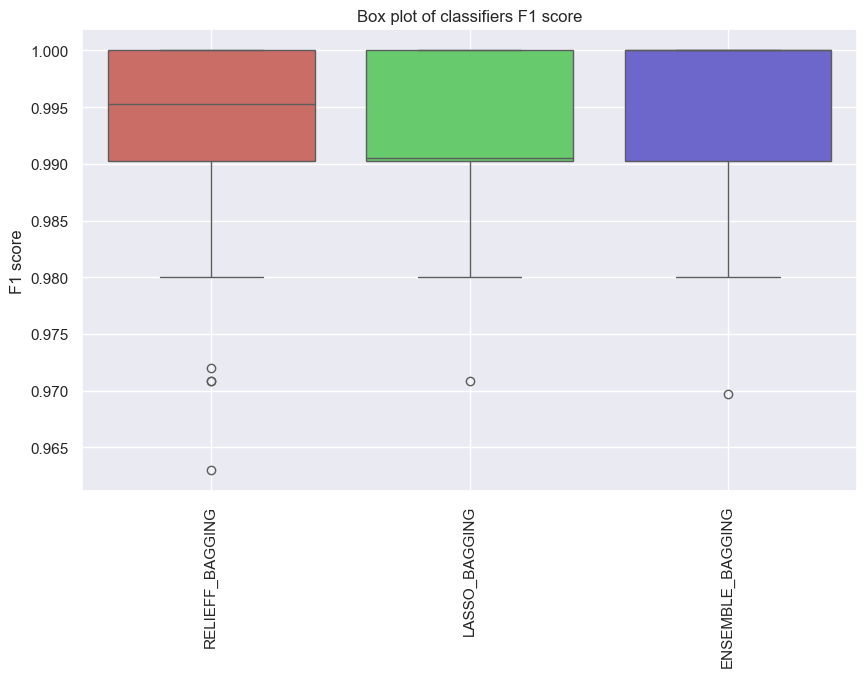

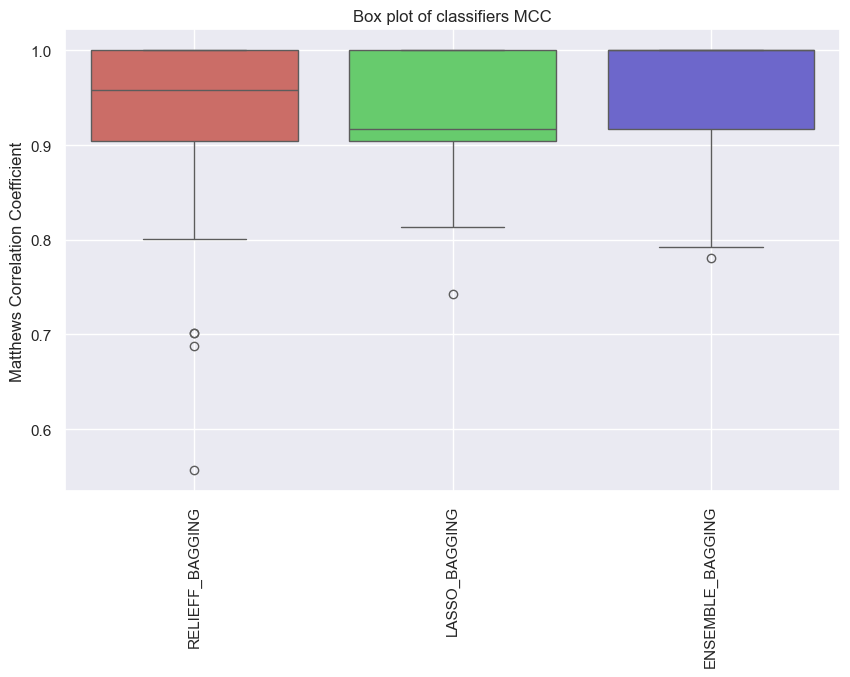

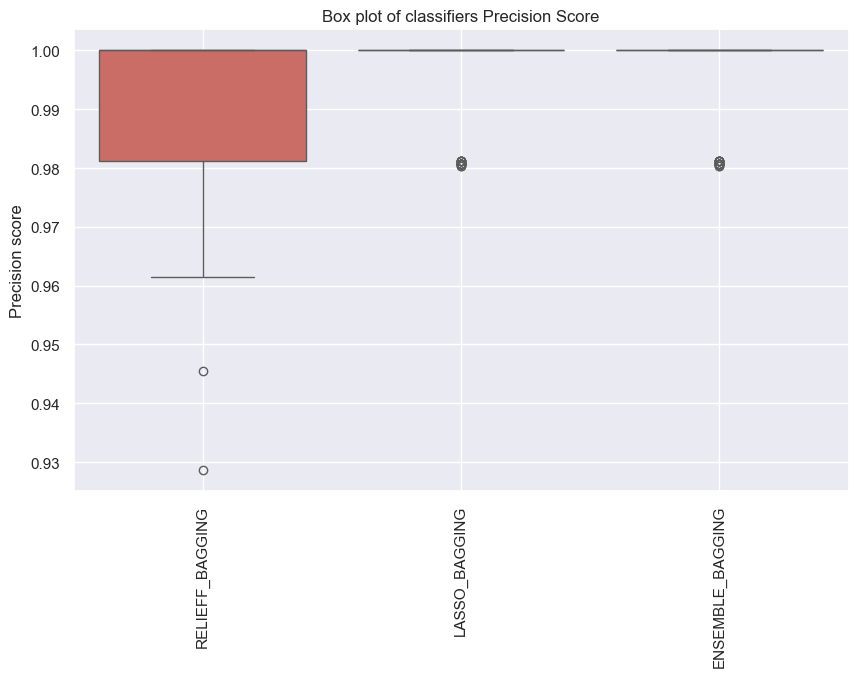

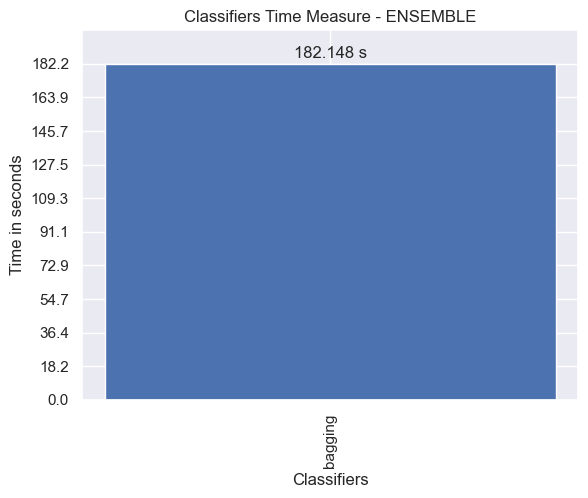

bagging: 182.148 s.


In [26]:
ens_bagging.plot_all()

In [27]:
ens_stacking = ens.Ensemble(
    X,
    y,
    features=[
        relieff_features.features,
        lasso_features.features,
        ensemble_features.features
    ],
    classifiers=[
        'adaboost',
        'random_forest',
        'svm',
    ],
    classifier_params=[
        {'adaboost': {
            'n_estimators': 100, 'learning_rate': 0.9,
            }
        },
        {'random_forest': {
            'n_estimators': 100, 'criterion': 'gini', 'max_depth': None,
            }
        },
        {'svm': {
            'C': 1, 'kernel': 'linear', 'gamma': 'auto'
            }
        },
    ],
    cv='stratified_k_fold',
    cv_params={'n_splits': 10},
    ensemble=[
        'stacking',
    ],
    ensemble_params=[
        {'stacking': {
            'final_estimator': None,
            }
        },
    ],
    repetitions=10,
)

In [28]:
ens_stacking.all_metrics()

[{'RELIEFF_STACKING': [np.float64(0.994), np.float64(0.009)],
  'LASSO_STACKING': [np.float64(0.995), np.float64(0.009)],
  'ENSEMBLE_STACKING': [np.float64(0.995), np.float64(0.008)]},
 {'RELIEFF_STACKING': [np.float64(0.981), np.float64(0.034)],
  'LASSO_STACKING': [np.float64(0.983), np.float64(0.036)],
  'ENSEMBLE_STACKING': [np.float64(0.986), np.float64(0.031)]},
 {'RELIEFF_STACKING': [np.float64(0.997), np.float64(0.005)],
  'LASSO_STACKING': [np.float64(0.997), np.float64(0.005)],
  'ENSEMBLE_STACKING': [np.float64(0.997), np.float64(0.005)]},
 {'RELIEFF_STACKING': [np.float64(0.967), np.float64(0.048)],
  'LASSO_STACKING': [np.float64(0.973), np.float64(0.049)],
  'ENSEMBLE_STACKING': [np.float64(0.976), np.float64(0.045)]},
 {'RELIEFF_STACKING': [np.float64(0.996), np.float64(0.008)],
  'LASSO_STACKING': [np.float64(0.997), np.float64(0.008)],
  'ENSEMBLE_STACKING': [np.float64(0.997), np.float64(0.007)]}]

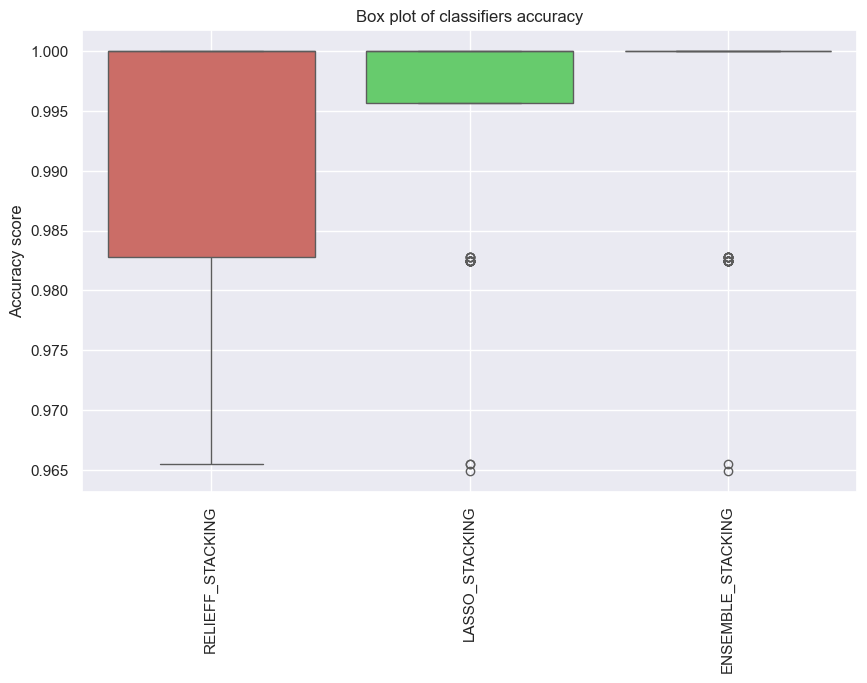

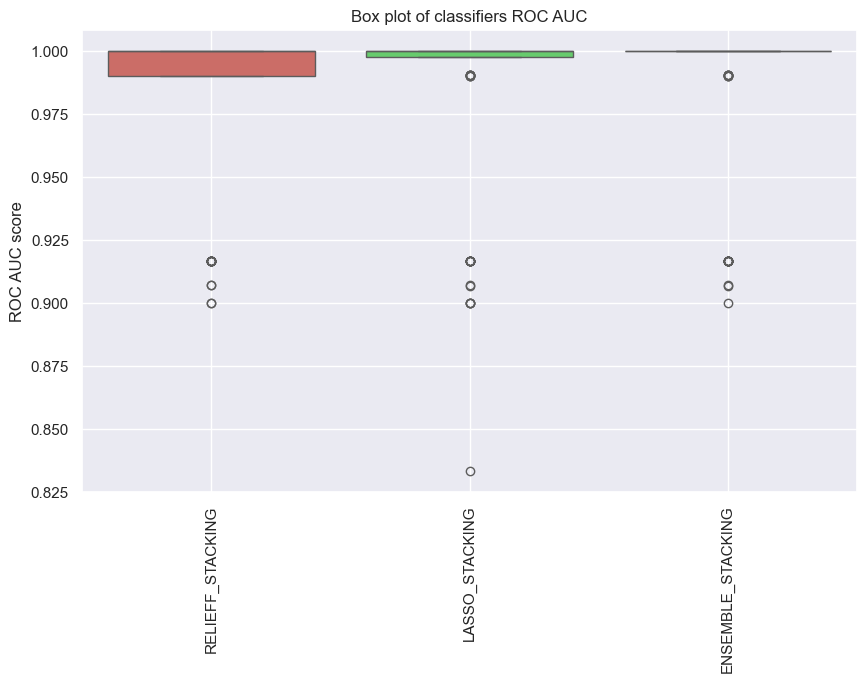

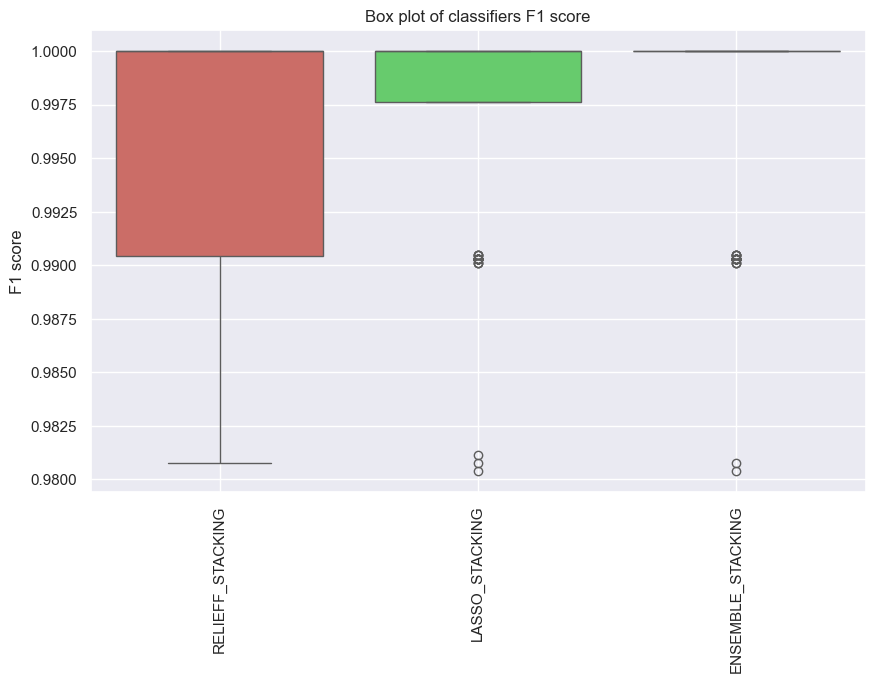

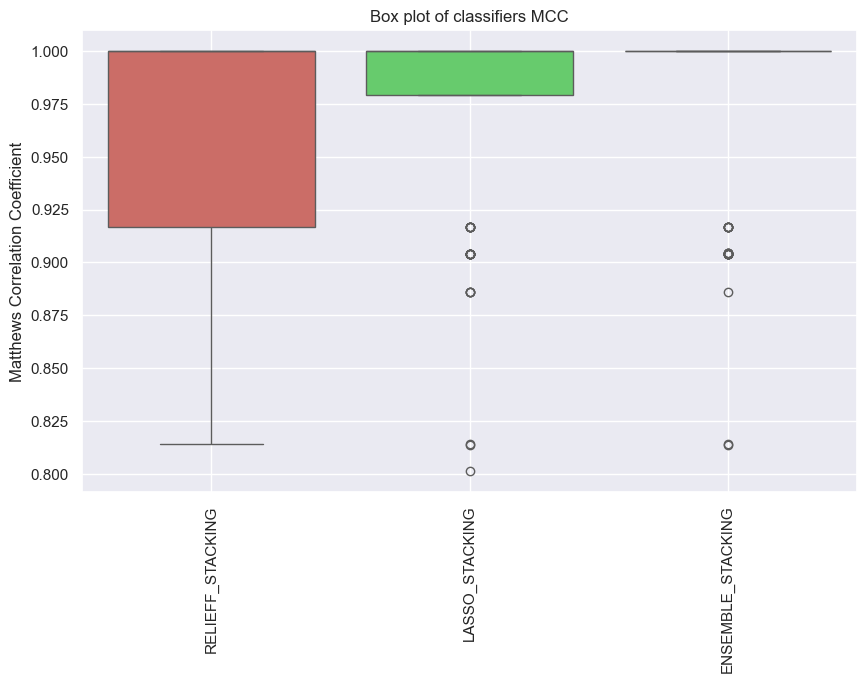

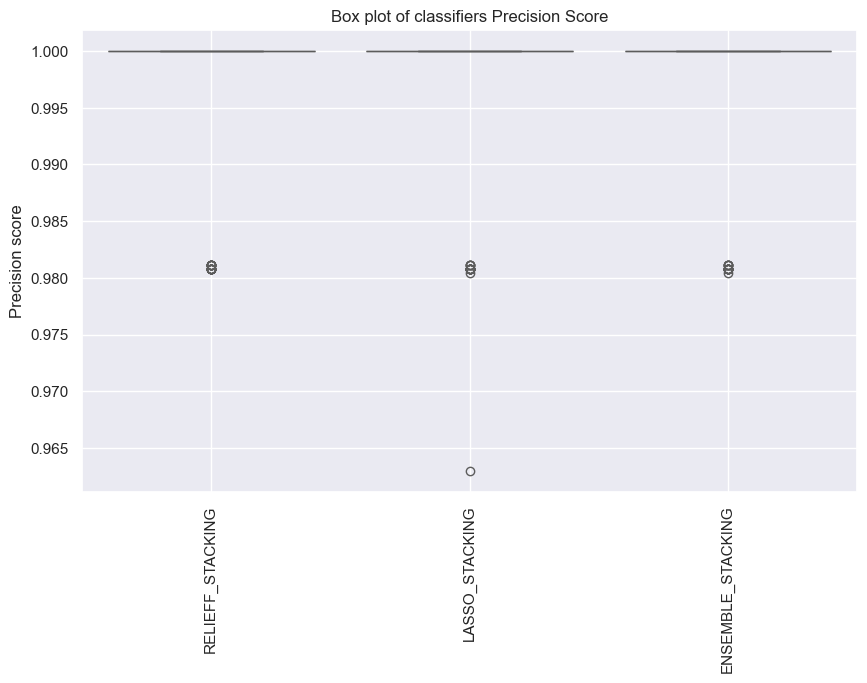

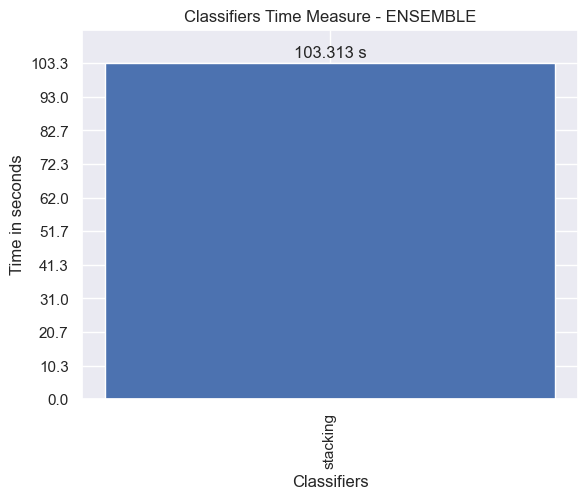

stacking: 103.313 s.


In [29]:
ens_stacking.plot_all()